In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_filepath = '/content/drive/MyDrive/AML Group 24/Files/'
data = pd.read_parquet(data_filepath + 'combined/met_gas_site.snappy.parquet', engine='pyarrow')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574851 entries, 0 to 574850
Data columns (total 51 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SITE_ID                574851 non-null  object        
 1   DATE_TIME              574851 non-null  datetime64[ns]
 2   TEMPERATURE            574576 non-null  object        
 3   TEMPERATURE_F          13119 non-null   object        
 4   TEMPERATURE_DELTA      112186 non-null  object        
 5   TEMPERATURE_DELTA_F    467379 non-null  object        
 6   RELATIVE_HUMIDITY      355641 non-null  object        
 7   RELATIVE_HUMIDITY_F    224302 non-null  object        
 8   SOLAR_RADIATION        349829 non-null  object        
 9   SOLAR_RADIATION_F      237679 non-null  object        
 10  OZONE                  574851 non-null  object        
 11  OZONE_F                21447 non-null   object        
 12  PRECIPITATION          350097 non-null  obje

In [ ]:
data = data.drop(columns=['UPDATE_DATE', 'Filename', 'FLOW_23M', 'FLOW_2M'])
numerical_columns = ['TEMPERATURE', 'TEMPERATURE_DELTA', 'RELATIVE_HUMIDITY', 'SOLAR_RADIATION', 'OZONE', 'PRECIPITATION', 'WINDSPEED', 'WIND_DIRECTION', 'SIGMA_THETA', 'FLOW_RATE',
                     'WINDSPEED_SCALAR', 'WETNESS', 'SHELTER_TEMPERATURE', 'CO', 'HNO3', 'NH3', 'NO', 'NO2_TRUE', 'NOX', 'NOXDIF', 'NOX_TRUE', 'NOY', 'NOYDIF', 'NOY_MINUS', 'SO2_GA',
                     'TNX', 'ELEVATION']
categorical_columns = ['TEMPERATURE_F', 'TEMPERATURE_DELTA_F', 'RELATIVE_HUMIDITY_F', 'SOLAR_RADIATION_F', 'OZONE_F', 'PRECIPITATION_F', 'WINDSPEED_F', 'WIND_DIRECTION_F', 'SIGMA_THETA_F',
                       'FLOW_RATE_F', 'WINDSPEED_SCALAR_F', 'WETNESS_F', 'SHELTER_TEMPERATURE_F', 'QA_CODE', 'LAND_USE', 'TERRAIN']
for col in numerical_columns:
  data[col] = data[col].astype(float)
downsampled_data = data.sample(frac=0.1)

In [ ]:
sns.pairplot(data.sample(frac=0.1), vars=numerical_columns, diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
downsampled_data = data.sample(frac=0.1)
fig, ax = plt.subplots(len(categorical_columns), len(categorical_columns), figsize=(len(categorical_columns)*10, len(categorical_columns)*10))
for i in range(len(categorical_columns)):
  for j in range(i+1, len(categorical_columns)):
    if i == j:
      continue
    ax[i, j].grid(False)
    cat_corr = pd.crosstab(downsampled_data[categorical_columns[i]], downsampled_data[categorical_columns[j]], margins=True, values=downsampled_data['SITE_ID'], aggfunc=pd.Series.count)
    im = ax[i, j].imshow(cat_corr, cmap='binary')
    ax[i, j].set_xticks(np.arange(len(cat_corr.columns)), labels=cat_corr.columns.tolist())
    ax[i, j].set_yticks(np.arange(len(cat_corr.index)), labels=cat_corr.index.tolist())
    ax[i, j].set_xlabel(cat_corr.columns.name)
    ax[i, j].set_ylabel(cat_corr.index.name)
    for k in range(len(cat_corr.index)):
        for l in range(len(cat_corr.columns)):
            text = ax[i, j].text(l, k, cat_corr.iloc[k, l], ha="center", va="center", color="w")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig, ax = plt.subplots(len(numerical_columns), len(categorical_columns), figsize=(len(categorical_columns)*10, len(numerical_columns)*10))
for i in range(len(categorical_columns)):
  for j in range(len(numerical_columns)):
    num = numerical_columns[j]
    cat = categorical_columns[i]
    numerical_column_j_not_null_df = downsampled_data.loc[downsampled_data[num].notna(), [cat, num]]
    pos = numerical_column_j_not_null_df[cat].unique()
    samples = [numerical_column_j_not_null_df.loc[numerical_column_j_not_null_df[cat] == pos_i, num].tolist() for pos_i in pos]
    zipped = zip(pos, samples)
    zipped = [k for k in zipped if len(k[1]) > 0]
    pos = [k[0] for k in zipped]
    samples = [k[1] for k in zipped]
    ax[j, i].violinplot(samples, np.arange(len(pos)), showmeans=True, showextrema=True, showmedians=True)
    ax[j, i].set_xticks(np.arange(len(pos)), labels=pos)
    ax[j, i].set_xlabel(categorical_columns[i])
    ax[j, i].set_ylabel(numerical_columns[j])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.DataFrame({'Total': [len(data)]*len(data.columns), 'Missing Values': (np.sum(data.isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(data.isna(), axis=0)/len(data)*100).tolist()}, index=data.columns)

,Total,Missing Values,Missing Values %
SITE_ID,574851,0,0.000000
DATE_TIME,574851,0,0.000000
TEMPERATURE,574851,275,0.047838
TEMPERATURE_F,574851,561732,97.717843
TEMPERATURE_DELTA,574851,462665,80.484334
TEMPERATURE_DELTA_F,574851,107472,18.695627
RELATIVE_HUMIDITY,574851,219210,38.133360
RELATIVE_HUMIDITY_F,574851,350549,60.980845
SOLAR_RADIATION,574851,225022,39.144404
SOLAR_RADIATION_F,574851,337172,58.653808


In [ ]:
quality_columns = ['TEMPERATURE_F', 'TEMPERATURE_DELTA_F', 'RELATIVE_HUMIDITY_F', 'SOLAR_RADIATION_F', 'OZONE_F', 'PRECIPITATION_F', 'WINDSPEED_F', 'WIND_DIRECTION_F', 'SIGMA_THETA_F', 'FLOW_RATE_F', 'WINDSPEED_SCALAR_F', 'WETNESS_F', 'SHELTER_TEMPERATURE_F']
for col in quality_columns:
  data.loc[:, col + '_'] = 'Valid'
  data.loc[data[col].isin(['B', 'C', 'D', 'F', 'H', 'I', 'J', 'M', 'P', 'T']), col + '_'] = 'Invalid'
measured_columns = ['TEMPERATURE', 'TEMPERATURE_DELTA', 'RELATIVE_HUMIDITY', 'SOLAR_RADIATION', 'OZONE', 'PRECIPITATION', 'WINDSPEED', 'WIND_DIRECTION', 'SIGMA_THETA', 'FLOW_RATE', 'WINDSPEED_SCALAR', 'WETNESS', 'SHELTER_TEMPERATURE']
for col in measured_columns:
  data.loc[:, col + '_'] = data.loc[:, col]
  data.loc[data[col + '_F_'] == 'Invalid', col + '_'] = np.nan
all_columns = ['SITE_ID', 'DATE_TIME', 'TEMPERATURE_', 'TEMPERATURE_DELTA_', 'RELATIVE_HUMIDITY_', 'SOLAR_RADIATION_', 'OZONE_', 'PRECIPITATION_', 'WINDSPEED_', 'WIND_DIRECTION_', 'SIGMA_THETA_', 'FLOW_RATE_', 'WINDSPEED_SCALAR_', 'WETNESS_', 'SHELTER_TEMPERATURE_', 'QA_CODE', 'CO', 'HNO3', 'NH3', 'NO', 'NO2_TRUE', 'NOX', 'NOXDIF', 'NOX_TRUE', 'NOY', 'NOYDIF', 'NOY_MINUS', 'SO2_GA', 'TNX', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'LAND_USE', 'TERRAIN']
pd.DataFrame({'Total': [len(data)]*len(all_columns), 'Missing Values': (np.sum(data[all_columns].isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(data[all_columns].isna(), axis=0)/len(data)*100).tolist()}, index=all_columns)

,Total,Missing Values,Missing Values %
SITE_ID,574851,0,0.000000
DATE_TIME,574851,0,0.000000
TEMPERATURE_,574851,8385,1.458639
TEMPERATURE_DELTA_,574851,466810,81.205391
RELATIVE_HUMIDITY_,574851,223644,38.904690
SOLAR_RADIATION_,574851,227665,39.604176
OZONE_,574851,0,0.000000
PRECIPITATION_,574851,231470,40.266086
WINDSPEED_,574851,228719,39.787528
WIND_DIRECTION_,574851,228791,39.800053


<Axes: >

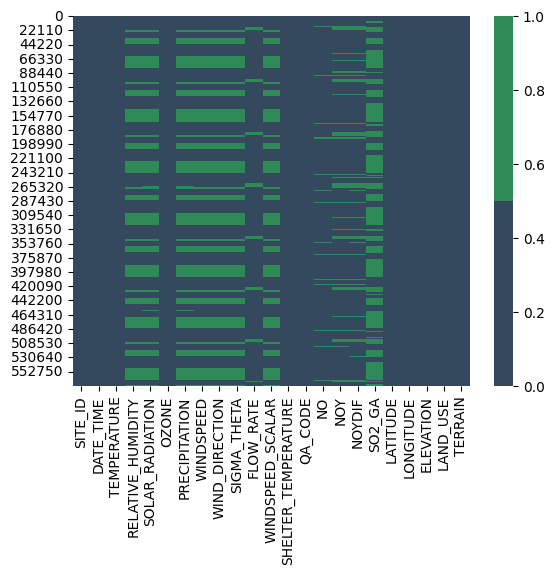

In [59]:
clean_columns = ['SITE_ID', 'DATE_TIME', 'TEMPERATURE', 'RELATIVE_HUMIDITY', 'SOLAR_RADIATION', 'OZONE', 'PRECIPITATION', 'WINDSPEED', 'WIND_DIRECTION', 'SIGMA_THETA', 'FLOW_RATE', 'WINDSPEED_SCALAR', 'SHELTER_TEMPERATURE', 'QA_CODE', 'NO', 'NOY', 'NOYDIF', 'SO2_GA', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'LAND_USE', 'TERRAIN']
clean_data = data.loc[:, clean_columns]
colours = ['#34495E', 'seagreen']
sns.heatmap(clean_data.isnull(), cmap=sns.color_palette(colours))

In [46]:
clean_data['SITE_ID'].unique()

array(['BEL116', 'BFT142', 'BVL130', 'CHC432', 'DUK008', 'GRS420',
       'HWF187', 'MAC426', 'PND165', 'PNF126', 'ROM206'], dtype=object)

<Axes: >

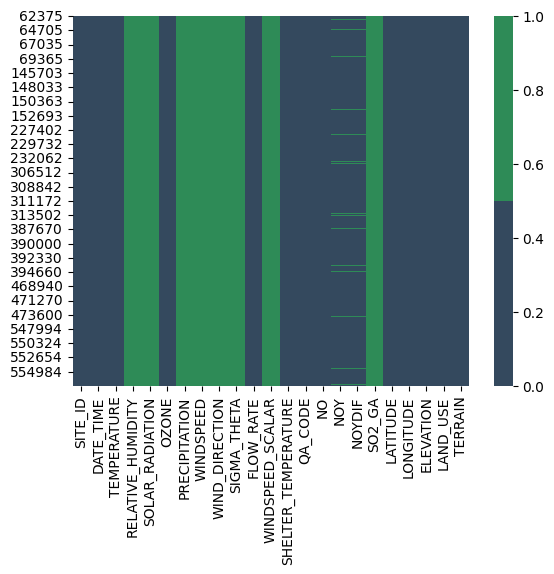

In [56]:
sns.heatmap(clean_data.loc[clean_data['SITE_ID'] == 'PNF126'].isnull(), cmap=sns.color_palette(colours))

<Axes: >

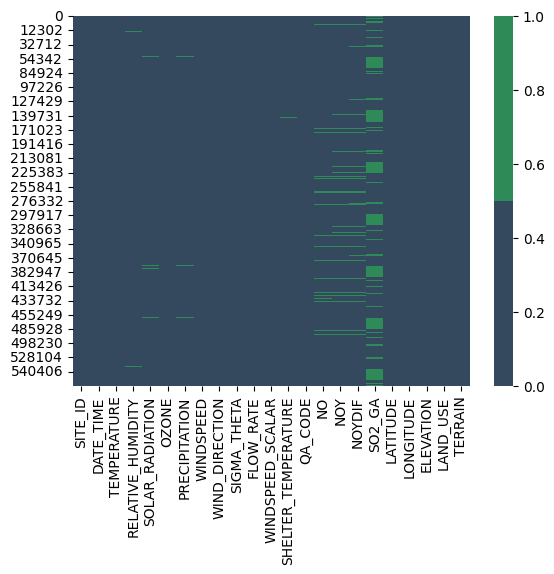

In [57]:
sns.heatmap(clean_data.loc[clean_data['SITE_ID'].isin(['BEL116', 'BFT142', 'BVL130', 'GRS420', 'MAC426', 'PND165'])].isnull(), cmap=sns.color_palette(colours))

In [60]:
clean_data = clean_data.loc[clean_data['SITE_ID'].isin(['BEL116', 'BFT142', 'BVL130', 'GRS420', 'MAC426', 'PND165'])]
pd.DataFrame({'Total': [len(clean_data)]*len(clean_columns), 'Missing Values': (np.sum(clean_data[clean_columns].isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(clean_data[clean_columns].isna(), axis=0)/len(clean_data)*100).tolist()}, index=clean_columns)

,Total,Missing Values,Missing Values %
SITE_ID,319835,0,0.000000
DATE_TIME,319835,0,0.000000
TEMPERATURE,319835,113,0.035331
RELATIVE_HUMIDITY,319835,1380,0.431472
SOLAR_RADIATION,319835,3685,1.152157
OZONE,319835,0,0.000000
PRECIPITATION,319835,3417,1.068363
WINDSPEED,319835,142,0.044398
WIND_DIRECTION,319835,211,0.065972
SIGMA_THETA,319835,142,0.044398


In [63]:
for col in clean_data.columns:
  if np.sum(clean_data[col].isna()) > 0:
    print(col)
    clean_data[col] = clean_data[col].fillna(np.mean(clean_data[col]))
pd.DataFrame({'Total': [len(clean_data)]*len(clean_columns), 'Missing Values': (np.sum(clean_data[clean_columns].isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(clean_data[clean_columns].isna(), axis=0)/len(clean_data)*100).tolist()}, index=clean_columns)

TEMPERATURE
RELATIVE_HUMIDITY
SOLAR_RADIATION
PRECIPITATION
WINDSPEED
WIND_DIRECTION
SIGMA_THETA
FLOW_RATE
WINDSPEED_SCALAR
SHELTER_TEMPERATURE
NO
NOY
NOYDIF
SO2_GA


,Total,Missing Values,Missing Values %
SITE_ID,319835,0,0.0
DATE_TIME,319835,0,0.0
TEMPERATURE,319835,0,0.0
RELATIVE_HUMIDITY,319835,0,0.0
SOLAR_RADIATION,319835,0,0.0
OZONE,319835,0,0.0
PRECIPITATION,319835,0,0.0
WINDSPEED,319835,0,0.0
WIND_DIRECTION,319835,0,0.0
SIGMA_THETA,319835,0,0.0


In [64]:
clean_data.to_parquet('/content/drive/MyDrive/AML Group 24/Files/met_gas_site_cleaned.snappy.parquet', engine='pyarrow')

Not every site has every parameter and not every parameter is measured at every site. We need to find out which site has ozone

In [ ]:
df_hourly_gas.loc[df_hourly_gas['PARAMETER'].isin(['O3_2M', 'O3_6M', 'O3_10M', 'O3_14M', 'O3_17M', 'O3_20M', 'O3_23M', 'O3_28M']), 'SITE_ID'].unique()

array(['HOW191'], dtype=object)

Apparently only HOW191 (!). What else is measured at HOW191 (because only those parameters and met data at HOW191 will be helpful now).

In [ ]:
df_hourly_gas.loc[df_hourly_gas['SITE_ID'] == 'HOW191', 'PARAMETER'].unique()

array(['FLOW_23M', 'FLOW_2M', 'O3_10M', 'O3_14M', 'O3_17M', 'O3_20M',
       'O3_23M', 'O3_28M', 'O3_2M', 'O3_6M', 'TEMP_23M', 'TEMP_2M'],
      dtype=object)

Only flow and temperature

In [ ]:
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8443813 entries, 0 to 8443812
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   SITE_ID                object        
 1   DATE_TIME              datetime64[ns]
 2   TEMPERATURE            object        
 3   TEMPERATURE_F          object        
 4   TEMPERATURE_DELTA      object        
 5   TEMPERATURE_DELTA_F    object        
 6   RELATIVE_HUMIDITY      object        
 7   RELATIVE_HUMIDITY_F    object        
 8   SOLAR_RADIATION        object        
 9   SOLAR_RADIATION_F      object        
 10  OZONE                  object        
 11  OZONE_F                object        
 12  PRECIPITATION          object        
 13  PRECIPITATION_F        object        
 14  WINDSPEED              object        
 15  WINDSPEED_F            object        
 16  WIND_DIRECTION         object        
 17  WIND_DIRECTION_F       object        
 18  SIGMA_THETA           

In [ ]:
import numpy as np
df_ozone = df_hourly_gas.loc[(df_hourly_gas['SITE_ID'] == 'HOW191') & (df_hourly_gas['PARAMETER'].isin(['O3_2M', 'O3_6M', 'O3_10M', 'O3_14M', 'O3_17M', 'O3_20M', 'O3_23M', 'O3_28M'])), :]
df_ozone['VALUE'] = np.where(df_ozone['VALUE_F'].isin(['B', 'C', 'D', 'F', 'I', 'M', 'N']), np.nan, df_ozone['VALUE'])
df_ozone = pd.pivot_table(df_ozone, index=['DATE_TIME'], columns=['PARAMETER'], values=['VALUE'])
df_ozone.columns = df_ozone.columns.droplevel(0)
df_ozone

<ipython-input-30-bebe7174d9a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ozone['VALUE'] = np.where(df_ozone['VALUE_F'].isin(['B', 'C', 'D', 'F', 'I', 'M', 'N']), np.nan, df_ozone['VALUE'])


PARAMETER,O3_10M,O3_14M,O3_17M,O3_20M,O3_23M,O3_28M,O3_2M,O3_6M
DATE_TIME,,,,,,,,
2013-01-01 00:00:00,31.00,31.66,31.12,31.37,31.33,31.78,26.20,30.60
2013-01-01 01:00:00,30.85,NaN,31.54,31.66,31.67,31.83,22.70,30.54
2013-01-01 02:00:00,30.89,31.55,NaN,31.47,31.31,31.80,28.09,30.59
2013-01-01 03:00:00,31.53,31.84,31.67,31.80,31.77,31.83,30.01,31.25
2013-01-01 04:00:00,31.84,32.21,31.90,31.92,32.17,32.19,28.78,31.25
...,...,...,...,...,...,...,...,...
2013-04-29 14:00:00,53.70,55.72,54.32,54.77,55.60,55.51,52.09,52.95
2013-04-29 15:00:00,62.53,62.80,62.41,62.72,62.73,62.65,61.57,62.34
2013-04-29 16:00:00,62.11,62.57,62.14,61.50,62.09,62.68,61.00,61.96


In [ ]:
quality = df_ozone.isna().sum()/len(df_ozone)*100
quality

PARAMETER
O3_10M    0.250537
O3_14M    4.223336
O3_17M    1.181102
O3_20M    0.501074
O3_23M    0.250537
O3_28M    0.214746
O3_2M     0.214746
O3_6M     0.214746
dtype: float64

2, 6 and 28M are the best in quality

In [ ]:
df_ozone.describe(percentiles=[0.25, 0.50, 0.75])

PARAMETER,O3_10M,O3_14M,O3_17M,O3_20M,O3_23M,O3_28M,O3_2M,O3_6M
count,2787.000000,2676.000000,2761.000000,2780.000000,2787.000000,2788.00000,2788.000000,2788.000000
mean,35.734886,36.933714,37.528385,38.038205,38.094923,38.41208,33.014029,34.816739
std,8.859850,8.031572,7.597143,7.354647,7.340519,7.19873,10.446949,9.464372
min,3.513000,9.120000,12.170000,13.190000,13.510000,13.83000,0.696000,1.350000
25%,30.900000,32.545000,33.370000,34.110000,34.135000,34.40500,27.270000,29.700000
50%,36.740000,37.625000,37.990000,38.480000,38.500000,38.68000,35.140000,36.150000
75%,41.805000,42.390000,42.710000,42.942500,42.965000,43.08000,40.400000,41.350000
max,62.530000,62.800000,62.410000,62.720000,62.730000,62.68000,61.570000,62.340000


In [ ]:
import matplotlib.pyplot as plt

corr = df_ozone.corr()
corr.style.background_gradient(cmap='coolwarm')

PARAMETER,O3_10M,O3_14M,O3_17M,O3_20M,O3_23M,O3_28M,O3_2M,O3_6M
PARAMETER,,,,,,,,
O3_10M,1.000000,0.979313,0.933142,0.886111,0.869959,0.855534,0.928494,0.983911
O3_14M,0.979313,1.000000,0.971793,0.932432,0.916454,0.907417,0.885787,0.949134
O3_17M,0.933142,0.971793,1.000000,0.981990,0.973012,0.962886,0.846674,0.902353
O3_20M,0.886111,0.932432,0.981990,1.000000,0.996522,0.992198,0.810602,0.858278
O3_23M,0.869959,0.916454,0.973012,0.996522,1.000000,0.992531,0.797730,0.842831
O3_28M,0.855534,0.907417,0.962886,0.992198,0.992531,1.000000,0.783041,0.827681
O3_2M,0.928494,0.885787,0.846674,0.810602,0.797730,0.783041,1.000000,0.968019
O3_6M,0.983911,0.949134,0.902353,0.858278,0.842831,0.827681,0.968019,1.000000


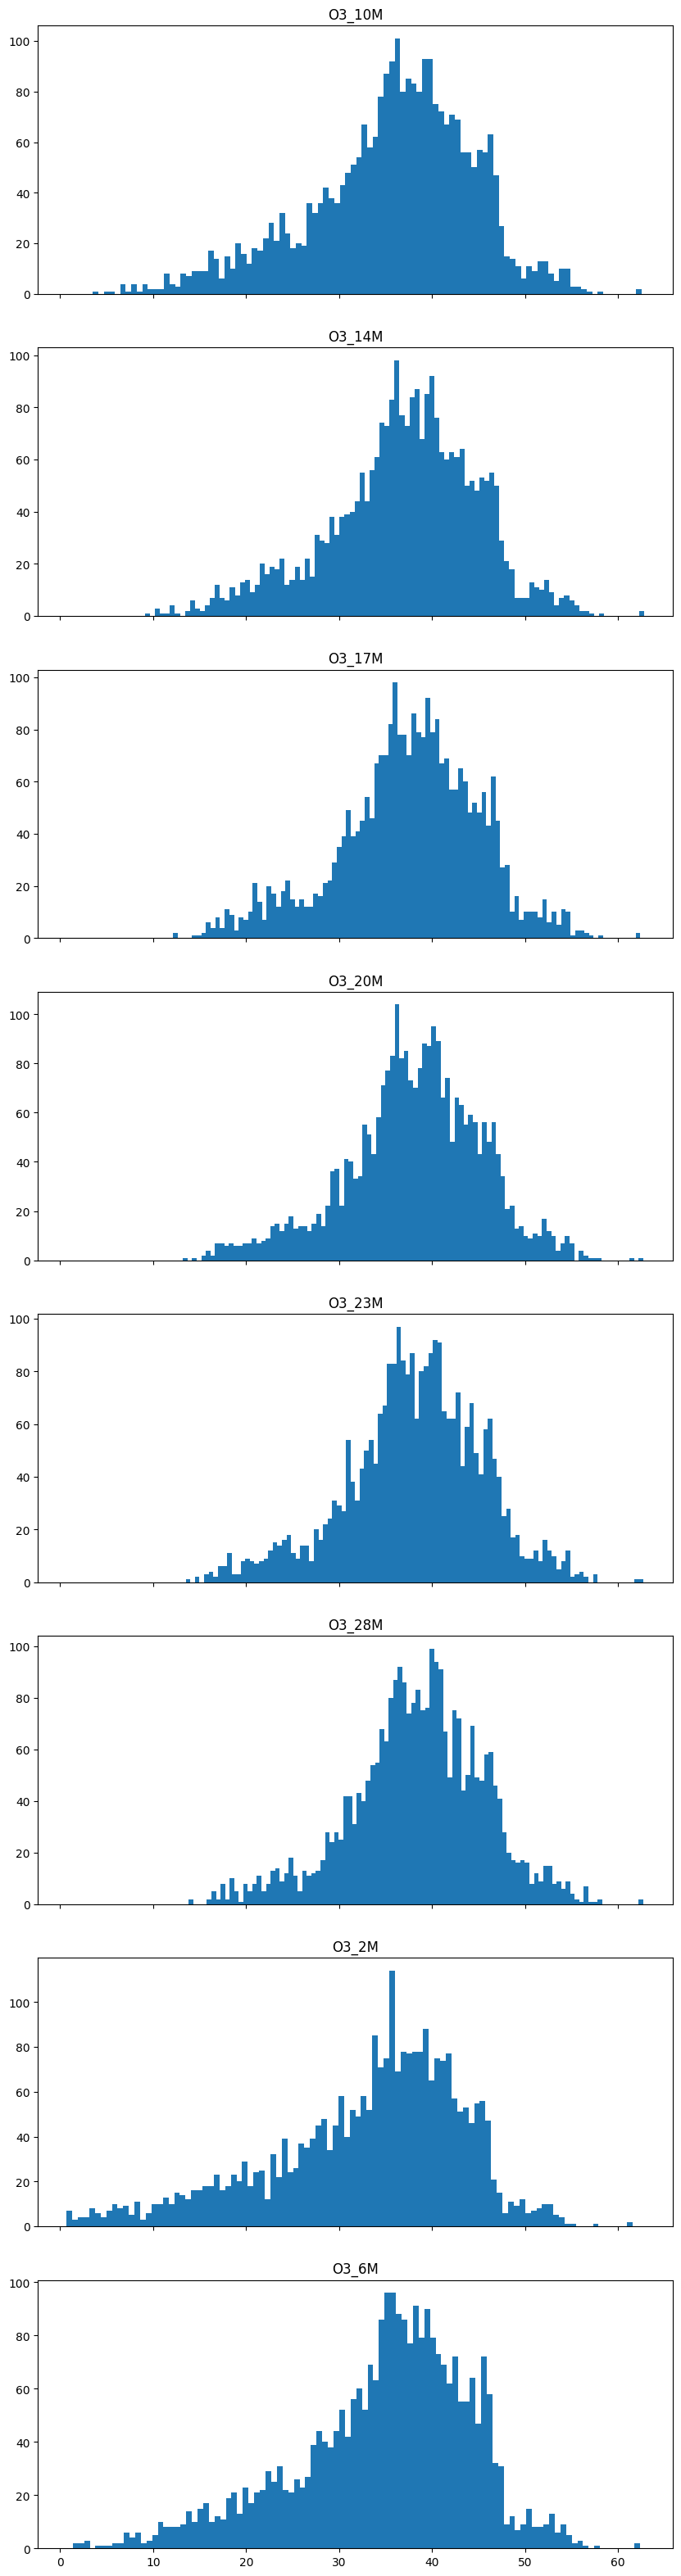

In [ ]:
fig, ax = plt.subplots(8, 1, figsize=(10, 40), sharex=True)
for i in range(8):
  ax[i].hist(df_ozone.iloc[:, i], bins=100);
  ax[i].set_title(df_ozone.columns[i]);

plt.show()

Conclusion: take both O3_2M and O3_28M